Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

Load your zillow dataset.

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tax_value using only sqft.

Here is some sample code to get you started:


from sklearn.linear_model import LinearRegression

#### assuming X and y are already defined

model = LinearRegression().fit(X, y)
predictions = model.predict(X)
Modify and add to the code above as necessary for it to work with the zillow dataset.

Plot the residuals for the linear regression model that you made.

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

What is the amount of variance explained in your model?

Is your model better than the baseline model?

Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot

regression_errors(y, yhat): returns the following values:

sum of squared errors (SSE)

explained sum of squares (ESS)

total sum of squares (TSS)

mean squared error (MSE)

root mean squared error (RMSE)

baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

Bonus Exercises

Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [66]:
import pandas as pd
import numpy as np
import wrangle
import explore
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [338]:
# load the zillow dataset and save to a variable
df = wrangle.wrangle_zillow()

In [339]:
# split the zillow dataset into train, validate, test using wrangle.py function
train, validate, test = wrangle.split_data(df)

In [340]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips
864307,4,3.0,2164.0,514069.0,1970,6792.81,6037
1433067,5,5.0,3582.0,326561.0,1990,4164.22,6037
1170762,3,2.5,1397.0,266050.0,1989,3735.74,6059
1694318,4,3.0,2208.0,105567.0,1926,1405.65,6037
149423,4,2.0,1631.0,356406.0,1969,4323.56,6059


In [341]:
# set the baseline prediction to the variable baseline (mean of target)
baseline = train.tax_value.mean()

In [342]:
# create a new column with the baseline predictions
train['baseline'] = baseline

In [343]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips,baseline
864307,4,3.0,2164.0,514069.0,1970,6792.81,6037,280186.669215
1433067,5,5.0,3582.0,326561.0,1990,4164.22,6037,280186.669215
1170762,3,2.5,1397.0,266050.0,1989,3735.74,6059,280186.669215
1694318,4,3.0,2208.0,105567.0,1926,1405.65,6037,280186.669215
149423,4,2.0,1631.0,356406.0,1969,4323.56,6059,280186.669215


In [344]:
# make and fit the linear regression model to the selected variables in train and the target variable
ols_model = LinearRegression().fit(train[['sqft']], train.tax_value)

In [345]:
# create a new column in the dataframe for the model predictions (yhat)
train['yhat'] = ols_model.predict(train[['sqft']])

In [346]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips,baseline,yhat
864307,4,3.0,2164.0,514069.0,1970,6792.81,6037,280186.669215,324283.180032
1433067,5,5.0,3582.0,326561.0,1990,4164.22,6037,280186.669215,438906.594061
1170762,3,2.5,1397.0,266050.0,1989,3735.74,6059,280186.669215,262283.068212
1694318,4,3.0,2208.0,105567.0,1926,1405.65,6037,280186.669215,327839.900918
149423,4,2.0,1631.0,356406.0,1969,4323.56,6059,280186.669215,281198.356564


In [347]:
# create a new column for the model residual error
train['residual'] = train.yhat - train.tax_value
# create a new column for the baseline residual error
train['residual_baseline'] = train.baseline - train.tax_value

In [348]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year,tax_amount,fips,baseline,yhat,residual,residual_baseline
864307,4,3.0,2164.0,514069.0,1970,6792.81,6037,280186.669215,324283.180032,-189785.819968,-233882.330785
1433067,5,5.0,3582.0,326561.0,1990,4164.22,6037,280186.669215,438906.594061,112345.594061,-46374.330785
1170762,3,2.5,1397.0,266050.0,1989,3735.74,6059,280186.669215,262283.068212,-3766.931788,14136.669215
1694318,4,3.0,2208.0,105567.0,1926,1405.65,6037,280186.669215,327839.900918,222272.900918,174619.669215
149423,4,2.0,1631.0,356406.0,1969,4323.56,6059,280186.669215,281198.356564,-75207.643436,-76219.330785


In [349]:
# calculate the model's sum of squares error for the selected variables against the target variable
SSE = mean_squared_error(train.tax_value, train.yhat)*len(train)
# calculate the baseline's sum of squares error for the selected variables against the target variable
SSE_baseline = mean_squared_error(train.tax_value, train.baseline)*len(train)
# calculate the model mean squared error for the selected variables against the target variable
MSE = mean_squared_error(train.tax_value, train.yhat)
# calculate the baseline mean squared error for the selected variables against the target variable
MSE_baseline = mean_squared_error(train.tax_value, train.baseline)
# calculate the model root mean squared error for the selected variables against the target variable
RMSE = sqrt(mean_squared_error(train.tax_value, train.yhat))
# calculate the baseline root mean squared error for the selected variables against the target variable
RMSE_baseline = sqrt(mean_squared_error(train.tax_value, train.baseline))

In [350]:
# create a dataframe for the model SSE, MSE, RMSE
train_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
# create a dataframe to show the baseline SSE, MSE, RMSE
train_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])
# add a column to the train_eval dataframe for the values associated with each model metric
train_eval['model_error'] = np.array([SSE, MSE, RMSE])
# add a column to the train_baseline_eval for the values associated with each baseline metric
train_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])
# print the dataframes
print(train_eval)
print(train_baseline_eval)

  metric   model_error
0    SSE  2.018489e+16
1    MSE  2.020048e+10
2   RMSE  1.421284e+05
          metric   model_error
0   SSE_baseline  2.231489e+16
1   MSE_baseline  2.233213e+10
2  RMSE_baseline  1.494394e+05


In [351]:
# add a column to train_eval for the error delta for each metric
train_eval['error_delta'] = train_eval.model_error - train_baseline_eval.model_error
train_eval

,metric,model_error,error_delta
0,SSE,2.018489e+16,-2.129999e+15
1,MSE,2.020048e+10,-2.131644e+09
2,RMSE,1.421284e+05,-7.310974e+03


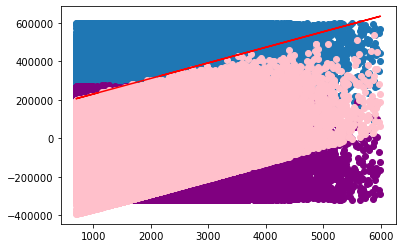

In [108]:
# create a scatterplot of sqft and tax_value
plt.scatter(train.sqft, y=train.tax_value)
# draw the regression line for the model predictions
plt.plot(train.sqft, train.yhat, color='red')
# create a scatterplot of the baseline residual error
plt.scatter(train.sqft, train.residual_baseline, color='purple')
# create a scatterplot of the model residual error
plt.scatter(train.sqft, train.residual, color='pink')

In [352]:
# calculate the r2 score for the model using sklearn
r2_score(train.tax_value, train.yhat)

0.09545191652772544

In [353]:
# assign values for TSS and ESS in order to manually calculate the r2
TSS = SSE_baseline
ESS = TSS - SSE

In [354]:
# manually calculate the r2
R2 = ESS/TSS
R2

0.09545191652772547

#### Use variables to use in place of columns for multiple feature selection and to use in functions later

In [355]:
y = train.tax_value
cols = ['tax_amount']

In [356]:
# make and fit the linear regression model using the selected features and target variable
ols_model = LinearRegression().fit(train[cols], y)

In [357]:
# create a new column in train for the model predictions (yhat)
train['yhat'] = ols_model.predict(train[cols])

In [358]:
# assign the target column of the train dataset to y
y = train.tax_value
# assign the model predictions column to yhat
yhat = train.yhat
# assign the baseline prediction to baseline
baseline = train.baseline

In [359]:
# create a new column in train for the model residual values
train['residual'] = yhat - y
# create a new column in train for the baseline residual values
train['residual_baseline'] = baseline - y

In [360]:
# calculate the model's sum of squares error for the selected variables against the target variable
SSE = mean_squared_error(y, yhat)*len(y)
# calculate the baseline's sum of squares error for the selected variables against the target variable
SSE_baseline = mean_squared_error(y, baseline)*len(y)
# calculate the model mean squared error for the selected variables against the target variable
MSE = mean_squared_error(y, yhat)
# calculate the baseline mean squared error for the selected variables against the target variable
MSE_baseline = mean_squared_error(y, baseline)
# calculate the model root mean squared error for the selected variables against the target variable
RMSE = sqrt(mean_squared_error(y, yhat))
# calculate the baseline root mean squared error for the selected variables against the target variable
RMSE_baseline = sqrt(mean_squared_error(y, baseline))

In [361]:
# create a dataframe for the model SSE, MSE, RMSE
train_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
# create a dataframe to show the baseline SSE, MSE, RMSE
train_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])
# add a column to the train_eval dataframe for the values associated with each model metric
train_eval['model_error'] = np.array([SSE, MSE, RMSE])
# add a column to the train_baseline_eval for the values associated with each baseline metric
train_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])
# print the dataframes
print(train_eval)
print(train_baseline_eval)

  metric   model_error
0    SSE  1.700157e+15
1    MSE  1.701471e+09
2   RMSE  4.124889e+04
          metric   model_error
0   SSE_baseline  2.231489e+16
1   MSE_baseline  2.233213e+10
2  RMSE_baseline  1.494394e+05


In [364]:
# create a new column in train_eval that contains the error delta for the model
train_eval['error_delta'] = train_eval.model_error - train_baseline_eval.model_error
train_eval

,metric,model_error,error_delta
0,SSE,1.700157e+15,-2.061473e+16
1,MSE,1.701471e+09,-2.063066e+10
2,RMSE,4.124889e+04,-1.081905e+05


In [363]:
# calculate the r2 score for the model using sklearn
r2_score(y, yhat)

0.9238106253203444

<AxesSubplot:xlabel='tax_value', ylabel='residual'>

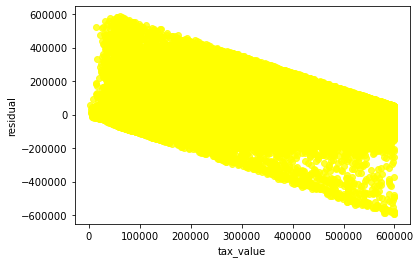

In [379]:
sns.regplot(x=train.tax_value, y='residual', data=train, color='yellow')

#### Create functions for printing regression errors, baseline mean errors, and better than baseline evaluation

In [375]:
# create a function to print the regression errors for the model
def regression_errors(y, yhat):
    '''This function takes in two arguments, a previously assigned target variable (y) and the model predictions 
    (yhat). The function calculates the sum of squares error, explained sum of squares, total sum of squares,
    mean squared error, and root mean squared error. It prints strings for each value to the first decimal.'''
    # calculate the sum of squares error from the selected variables
    SSE = mean_squared_error(y, yhat)*len(y)
    # calculate the explained sum of squares from the predictions and the baseline
    ESS = sum((yhat - y.mean())**2)
    # calculate the total sum of squares
    TSS = ESS + SSE
    # calculate the mean squared error
    MSE = mean_squared_error(y, yhat)
    # calculate the root mean squared error
    RMSE = sqrt(mean_squared_error(y, yhat))
    # print the calculated values for each
    print(f'Model SSE is: {"{:.1f}".format(SSE)}')
    print(f'Model ESS is: {"{:.1f}".format(ESS)}')
    print(f'Model TSS is: {"{:.1f}".format(TSS)}')
    print(f'Model MSE is: {"{:.1f}".format(MSE)}')
    print(f'Model RMSE is: {"{:.1f}".format(RMSE)}')

In [376]:
regression_errors(y, yhat)

Model SSE is: 1700157291353692.0
Model ESS is: 20614729771339368.0
Model TSS is: 22314887062693060.0
Model MSE is: 1701470826.8
Model RMSE is: 41248.9


In [216]:
# create a function to print the baseline mean errors
def baseline_mean_errors(y):
    '''This function takes in a single argument, y (the target variable) and prints the sum of squares
    error, mean squared error, and root mean squared error for baseline.'''
    # calculate the baseline sum of squares error
    SSE_baseline = mean_squared_error(y, baseline)*len(y)
    # calculate the baseline mean squared error
    MSE_baseline = mean_squared_error(y, baseline)
    # calculate the baseline root mean squared error
    RMSE_baseline = sqrt(mean_squared_error(y, baseline))
    # print the calculated values for each baseline error
    print(f'SSE baseline: {"{:.1f}".format(SSE_baseline)}')
    print(f'MSE baseline: {"{:.1f}".format(MSE_baseline)}')
    print(f'RMSE baseline: {"{:.1f}".format(RMSE_baseline)}')

In [217]:
baseline_mean_errors(y)

SSE baseline: 22314887062692692.0
MSE baseline: 22332127465.1
RMSE baseline: 149439.4


In [377]:
# create a function to determine if the model performs better than baseline
def better_than_baseline(y, yhat):
    '''This function takes in two arguments, y (target variable) and yhat (model predictions) and calculates the 
    model SSE, MSE, and RMSE against the baseline. The function prints three strings, one for each result, with a
    boolean for whether or not the model value is better than baseline value.'''
    SSE = mean_squared_error(y, yhat)*len(y)
    SSE_baseline = mean_squared_error(y, baseline)*len(y)
    MSE = mean_squared_error(y, yhat)
    MSE_baseline = mean_squared_error(y, baseline)
    RMSE = sqrt(mean_squared_error(y, yhat))
    RMSE_baseline = sqrt(mean_squared_error(y, baseline))
    
    print(f'Model SSE is better than SSE baseline: {SSE < SSE_baseline}')
    print(f'Model MSE is better than MSE baseline: {MSE < MSE_baseline}')
    print(f'Model RMSE is better than RMSE baseline: {RMSE < RMSE_baseline}')

In [378]:
better_than_baseline(y, yhat)

Model SSE is better than SSE baseline: True
Model MSE is better than MSE baseline: True
Model RMSE is better than RMSE baseline: True


#### Select new features and scale prior to creating the model

In [252]:
# assign features to a variable
cols = ['tax_amount', 'bathrooms', 'year']
# assign features to X for split datasets to use in fit, transformation, and modeling
X_train = train[cols]
X_validate = validate[cols]
X_test = test[cols]
y = train.tax_value

In [253]:
def standard_scaler():
    '''This function applies the .StandardScaler method from sklearn to previously assigned
    X_train, X_validate, and X_test variables and returns the scaled versions of each variable.'''
    # make the scaler
    scaler = StandardScaler()
    # fit and transform the X_train data
    X_train_standard = pd.DataFrame(scaler.fit_transform(X_train))
    # transform the X_validate data
    X_validate_standard = pd.DataFrame(scaler.transform(X_validate))
    # transform the X_test data
    X_test_standard = pd.DataFrame(scaler.transform(X_test))
    # return the scaled data for each renamed variable
    return X_train_standard, X_validate_standard, X_test_standard

In [254]:
# assign the scaled data from standard scaler function to variables
X_train_standard, X_validate_standard, X_test_standard = standard_scaler()

In [255]:
# fit X_train to the ols model
ols_model = LinearRegression().fit(X_train_standard, train.tax_value)

In [256]:
# create a new column for the model predictions (yhat)
train['yhat'] = ols_model.predict(X_train_standard)

In [257]:
# assign yhat as a variable for function arguments
yhat = train.yhat

In [258]:
# create column for model residual error
train['residual'] = train.yhat - y
# create column for baseline residual error
train['residual_baseline'] = train.baseline - y

In [259]:
# print regression errors for the model
regression_errors(y, yhat)

Model SSE is: 1697678401934155.5
Model ESS is: 20617208660759688.0
Model TSS is: 22314887062693844.0
Model MSE is: 1698990022.2
Model RMSE is: 41218.8


In [260]:
# print the baseline mean errors
baseline_mean_errors(y)

SSE baseline: 22314887062692692.0
MSE baseline: 22332127465.1
RMSE baseline: 149439.4


In [261]:
# evaluate the model against baseline predictions
better_than_baseline(y, yhat)

Model SSE is better than SSE baseline: True
Model MSE is better than MSE baseline: True
Model RMSE is better than RMSE baseline: True


In [262]:
# calculate r2 score for the model
r2_score(y, yhat)

0.9239217121213922

In [296]:
# reassign variables to test a new model
cols = ['bedrooms', 'bathrooms', 'sqft', 'year', 'fips']
X_train = train[cols]
X_validate = validate[cols]
X_test = test[cols]

In [297]:
def minmax_scaler():
    '''This function applies the .MinMaxScaler method from sklearn to previously assigned
    X_train, X_validate, and X_test variables and returns the scaled versions of each variable.'''
    # make the scaler
    scaler = MinMaxScaler()
    # fit and transform the X_train data
    X_train_minmax = pd.DataFrame(scaler.fit_transform(X_train))
    # transform the X_validate data
    X_validate_minmax = pd.DataFrame(scaler.transform(X_validate))
    # transform the X_test data
    X_test_minmax = pd.DataFrame(scaler.transform(X_test))
    # return the scaled data for each renamed variable
    return X_train_minmax, X_validate_minmax, X_test_minmax


In [298]:
# assign the scaled data from minmax scaler function to variables
X_train_scaled, X_validate_scaled, X_test_scaled = minmax_scaler()

In [299]:
# fit the model on scaled train variables and target
ols_model = LinearRegression().fit(X_train_scaled, train.tax_value)

In [300]:
# create a new column for model predictions
train['yhat'] = ols_model.predict(X_train_scaled)

In [301]:
# assign y and yhat for use as arguments in functions
y = train.tax_value
yhat = train.yhat

In [302]:
# create column for model residual error
train['residual'] = train.yhat - train.tax_value
# create column for baseline residual error
train['residual_baseline'] = train.baseline - train.tax_value

In [303]:
# print model regression errors
regression_errors(y, yhat)

Model SSE is: 19775651854185128.0
Model ESS is: 2539235208495694.0
Model TSS is: 22314887062680824.0
Model MSE is: 19790930452.5
Model RMSE is: 140680.2


In [304]:
# print baseline mean errors
baseline_mean_errors(y)

SSE baseline: 22314887062692692.0
MSE baseline: 22332127465.1
RMSE baseline: 149439.4


In [305]:
# evaluate the model against baseline predictions
better_than_baseline(y, yhat)

Model SSE is better than SSE baseline: True
Model MSE is better than MSE baseline: True
Model RMSE is better than RMSE baseline: True


In [306]:
# calculate the r2 score for the model
r2_score(y, yhat)

0.1137910849099838

In [380]:
def plot_residuals(y, yhat):
    '''This function takes in two arguments, y (target variable) and yhat (model predictions) and returns a 
    scatterplot of the residuals of the target variable.'''
    residuals = y - yhat
    plt.scatterplot(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residuals for Home Value')
    plt.show()